Some more information on the tarfile library can be found here:
https://docs.python.org/3/library/tarfile.html

Information on using pyarrow to manipulate parquet files
https://arrow.apache.org/docs/python/parquet.html#reading-parquet-and-memory-mapping

Information on reading parquet files with pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [469]:
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [470]:
#Load tar.gz file into Python
#We are using 1 of 7

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [471]:
#tar.next() example. But be careful to reinstantiate tar when needed
#gopes through each file in TAR file
#can be regular data file opr directory

tar.next()

<TarInfo 'hitdata7days/visitday=10' at 0x7f9fdbad8400>

In [472]:
#Extracting filename from TarInfo object
#Gives name of file - can be regular data file or directory 

tn = tar.next()
tn.name

'hitdata7days/visitday=10/0017_part_00.parquet'

In [473]:
#Check if TarInfo is a file or a directory
#Good condition to through in a loop

print(tn.isreg())
print(tn.isdir())

True
False


In [474]:
#Reading info from parquet file
#Gives info on data types of columns in 1 parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [475]:
#Read in parquet file as pandas DataFrame
#Turns parquet file into data frame

df = pd.read_parquet(tn.name)

In [476]:
df.head(3)

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,18598956716,hit_data_fingerhutcomprod_2022-12-10.tsv,14603,FDM,2450573847312321896,394589978322276787,3,2022-12-10 00:08:42,2022-12-10,12,2022,12,50,1670652522,pe,"en-US,en;q=0.9","20599,111,112,127,129,145,155,171,182,10005,10...",U,172.58.8.3,10,None,no link_name,None,https://www.fingerhut.com/,index,None,None,None,None,None,None,None,index,None,None,None,None,None,None,None,https://www.fingerhut.com/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FSApproved,None,None,None,None,71268c61620e4cf9b4b469d9b5b46b6e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,0,0,None,None,None,None,None,1063982382,961,1873,Y,N,Y,2,4,300,t-mobile.com,9/11/2022 21:8

In [477]:
#change from object to strings or ints

for names in df.columns:
    
    df[names] = df[names].convert_dtypes()

In [481]:
#function useful to see variable value counts of a specific column... i.e. for device type how many tablets, desktops, etc...

def seeValues(data, category):

    counts = pd.DataFrame(data.groupby([category])[category].count())

    counts.rename(columns={category: 'counts'}, inplace=True,)

    counts = counts.sort_values(['counts'], ascending=[0])

    graph = counts.reset_index()

    return graph

In [482]:
seeValues(df, 'devicetype')

,devicetype,counts
0,Mobile,68541
1,Tablet,31292
2,Desktop,25030
3,Unknown,4


In [486]:
#get master list of purchase visit ids

ids_purchase = (df[df['checkoutthankyouflag'] == 1])['visitid'].drop_duplicates()

ids_purchase = ids_purchase.tolist()

In [487]:
#get master list of non-purhase visit ids

ids_no_purchase = (df[df['checkoutthankyouflag'] == 0])['visitid'].drop_duplicates()

ids_no_purchase

0            39458997832227678724505738473123218963
1           438881143000444646324262006776323122121
2           146182972103680958415337560435521638632
3           561768564684290310769185772627230813081
4           711975067652448083677454613831797284332
                            ...                    
121387     8964156177961493200727227278477259711898
121451     8615126470872377978491072523030738241020
121798     2180810176511898483274603619408162155223
122925      352006659250585204465889860247754019669
123148    26852661711729187766165687069733087179132
Name: visitid, Length: 16263, dtype: string

In [488]:
#create DF w only beginning hit of the visit

#filter by checking when sevrer call time matches visit start time

df_first_visit = df[df['hit_time_gmt']==df['visitstarttimegmt']]

In [489]:
#oldest visits first

df_first_visit = df_first_visit.sort_values(by='hit_time_gmt', inplace = False)

In [490]:
#lastly, grab first click of each user, because there are some duplicates

df_first_visit = df_first_visit.drop_duplicates(subset=['visitid'], keep = "first", inplace = False)

In [491]:
len(df_first_visit)

5235

In [502]:
#add put target variable

target = list()

for ids in df_first_visit['visitid']:
    
    if ids in ids_purchase:
        
        target.append(1)
        
    else:
        
        target.append(0)
        
df_first_visit.insert(0, "target", target)

ValueError: cannot insert target, already exists

In [501]:
df_first_visit.head(5) 

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
67335,0,18598982764,hit_data_fingerhutcomprod_2022-12-10.tsv,40675,FDM,6329001231427278940,6543149471813286931,21,2022-12-10 00:01:22,2022-12-10,12,2022,12,50,1670652082,ss,"en-US,en;q=0.9","20113=348,20538=1750,20539=1750,20540=0,20541=...",U,67.45.112.182,0,<NA>,<NA>,None,https://www.fingerhut.com/cart/index?CTKey=Car...,cart,;NPPUW;1;19.99;;,None,None,cart,cart,cart,cart,cart,<NA>,<NA>,None,None,54,AlreadyEnrolled,None,https://www.fingerhut.com/cart/index?CTKey=Car...,None,None,None,None,None,None,<NA>,<NA>,<NA>,None,None,None,<NA>,None,<NA>,Mature,None,None,None,Mature,7ecffc6b7bb245239f8e698c367ddcad,None,<NA>,<NA>,1002,<NA>,<NA>,<NA>,4NPPUWNTN0010,None,Fetti,<NA>,None,None,<NA>,None,<NA>,<NA>,IL,Mozilla/5.0 (Linux; Android 11; moto g play (2...,62988,0,0,None,

In [432]:
#data frame for percent of non-null values of each variable

percent = pd.DataFrame()

In [433]:
for names in df_first_visit.columns:
    
    percent[names] = [100 * (sum(seeValues(df_first_visit, names)['counts'])) / len(df_first_visit)]

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_68848/1003364056.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  percent[names] = [100 * (sum(seeValues(df_first_visit, names)['counts'])) / len(df_first_visit)]


In [434]:
percent

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.961796,99.866285,100.0,100.0,100.0,0.019102,25.787966,0.0,100.0,100.0,25.023878,0.0,0.0,72.320917,72.244508,72.244508,72.244508,86.112703,2.999045,9.149952,0.0,0.0,74.097421,34.383954,0.0,88.080229,0.0,0.0,0.0,0.0,0.0,0.0,0.019102,0.019102,0.038204,0.0,0.0,0.0,0.019102,0.0,0.458453,46.60936,0.0,0.0,0.0,35.262655,87.965616,0.0,0.152818,0.324737,32.206304,0.0,0.057307,0.0,1.337154,0.0,43.285578,0.267431,0.0,0.0,0.0,0.0,0.114613,0.019102,35.205349,100.0,35.205349,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,76.829035,73.447947,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0

In [459]:
#data frame for percent of non-null values of each variable for PURCHASERS

purchase_percent = pd.DataFrame()

df_first_visit_purchases = df_first_visit[df_first_visit['visitid'].isin(ids_purchase)]

In [460]:
for names in df_first_visit_purchases.columns:
    
    purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_68848/602259544.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]


In [461]:
purchase_percent

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,30.578512,0.0,100.0,100.0,10.743802,0.0,0.0,67.768595,67.768595,67.768595,67.768595,84.710744,2.066116,6.198347,0.0,0.0,69.421488,60.330579,0.0,86.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.826446,81.404959,0.0,0.0,0.0,61.157025,86.363636,0.0,0.413223,0.826446,59.090909,0.0,0.0,0.0,4.545455,0.0,76.859504,0.826446,0.0,0.0,0.0,0.0,0.0,0.413223,61.157025,100.0,61.157025,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,73.140496,69.421488,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0

In [462]:
#data frame for percent of non-null values of each variable for NON-PURCHASERS

no_purchase_percent = pd.DataFrame()

df_first_visit_purchases = df_first_visit[df_first_visit['visitid'].isin(ids_no_purchase)]

In [463]:
for names in df_first_visit_purchases.columns:
    
    no_purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_68848/1931683371.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  no_purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]


In [464]:
no_purchase_percent 

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.961693,99.865926,100.0,100.0,100.0,0.019153,25.857115,0.0,100.0,100.0,25.071825,0.0,0.0,72.246696,72.170082,72.170082,72.170082,86.075464,3.007087,9.174488,0.0,0.0,74.027964,34.22716,0.0,88.048267,0.0,0.0,0.0,0.0,0.0,0.0,0.019153,0.019153,0.038307,0.0,0.0,0.0,0.019153,0.0,0.459682,46.466194,0.0,0.0,0.0,35.089063,87.933346,0.0,0.153227,0.325608,32.04367,0.0,0.05746,0.0,1.321586,0.0,43.152653,0.248994,0.0,0.0,0.0,0.0,0.114921,0.0,35.031603,100.0,35.031603,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,76.80521,73.376748,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1

In [441]:
#data frame for difference in percent of non-null values between PURCHASERS and NON-PURCHASERS

difference = purchase_percent - no_purchase_percent 

In [457]:
#pull features with a 10% difference

significant = list()

for names in difference.columns:
    
    if abs(difference[names][0]) > 10:

        significant.append(names)

In [458]:
difference[significant]

,productlist,formanalysis,prop29,prop33,prop38,prop44,state,zip,paymentmethod,shippingmethod,crosssoldproduct,calculatorengagement,customerconnection,evar23,evar24,evar28,addonsymal,mvtparameters,freshstartcomplete,cdeincreasepayment,cdedeferredoffer,post_evar8,post_evar9,post_evar13,post_evar19,post_evar22,post_evar23,post_evar24,post_evar28,post_evar30,post_evar33,post_evar41,post_evar42,post_evar44,post_evar45,evar61,evar68,evar77,evar83,evar84,evar90,evar91
0,-14.328024,26.103419,34.938764,26.067961,27.047239,33.706851,26.125422,26.125422,12.465156,13.272449,34.862151,-17.524587,-17.524587,33.460706,23.517312,31.664796,31.886089,26.067961,22.982282,33.706851,18.499195,15.403306,24.218707,39.027782,-17.773581,-17.773581,42.38897,28.36471,36.51995,37.028545,41.729205,27.323144,10.526545,38.458086,20.732784,13.526667,23.160362,-12.485655,30.071817,10.457292,-14.592135,-12.562268


In [456]:
len(significant)

33

Text(0, 0.5, 'Number of Variables')

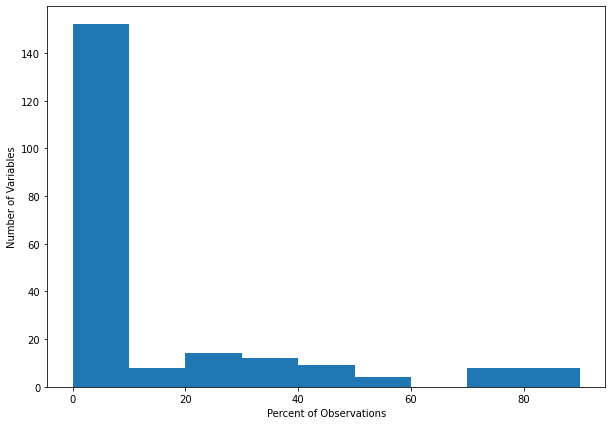

In [373]:
#histogram of variable frequency

fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(percent.iloc[0,:], bins = range(0,100,10))

plt.xlabel("Percent of Observations")
plt.ylabel("Number of Variables")

In [405]:
#lists for curating anmd removing features

features = list()
same_values = list()
mainly_same = list()

In [406]:
for names in percent.columns:
    
    if percent[names][0] > 10:
        
        features.append(names)

In [407]:
len(features)

131

In [408]:
for names in features:
    
    if len(seeValues(df_first_visit, names)) == 1:
        
        features.remove(names)
        same_values.append(names)

In [409]:
len(features)

122

In [410]:
same_values

['filename',
 'brandcode',
 'visitdate',
 'fiscalyear',
 'fiscalweeknumber',
 'homepage',
 'excludehit',
 'clicksourceid',
 'initialloaddate']

In [413]:
for names in features:
    
    highest = (seeValues(df_first_visit, names)).iloc[0,1]
    
    total = len(df_first_visit)
    
    if highest/total > 0.90:
        
        features.remove(names)
        mainly_same.append(names)
              

In [414]:
mainly_same

['visitmonth',
 'postcookies',
 'postpersistentcookie',
 'javascript',
 'prevpage',
 'geocountry',
 'duplicatepurchase',
 'clickactiontype',
 'checkoutthankyouflag',
 'updatedloaddate',
 'fiscalmonthnumber',
 'acceptlanguage',
 'searchengine',
 'postjavaenabled',
 'language_0001',
 'visitsearchengine',
 'clickcontexttype']

In [314]:
selected = df_first_visit[features]

In [327]:
highest = (seeValues(df_first_visit, 'devicetype')).iloc[0,1]

3038

In [331]:
sum((seeValues(df_first_visit, 'devicetype')).iloc[:,1])

5235

In [316]:
selected.head(5)

,hitdatahistorymkey,linenumber,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitmonth,fiscalmonthnumber,hit_time_gmt,service,acceptlanguage,eventlist,ip,pageevent,pageurl,pagename,sitesection,category,subcategory,subcategory2,pagecategory,myaccountengagement,emailsubscriptionremove,prop29,prop33,prop34,prop44,state,useragent,zip,searchengine,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,warrantycategory,crosssoldproduct,evar23,scene7,evar28,addonsymal,mvtparameters,institutionid,cdeincreasepayment,cdedspomodel,post_evar12,post_evar13,post_evar23,post_evar24,post_evar27,post_evar28,post_evar30,post_evar33,post_evar43,post_evar44,post_evar46,clickactiontype,clickcontexttype,visitid,cookieid,checkoutthankyouflag,evar56,evar72,evar83,updatedloaddate,devicetype
67335,18598982764,40675,6329001231427278940,6543149471813286931,21,2022-12-10 00:01:22,12,12,1670652082,ss,"en-US,en;q=0.9","20113=348,20538=1750,20539=1750,20540=0,20541=...",67.45.112.182,0,https://www.fingerhut.com/cart/index?CTKey=Car...,cart,cart,cart,cart,cart,cart,54,https://www.fingerhut.com/cart/index?CTKey=Car...,Mature,Mature,7ecffc6b7bb245239f8e698c367ddcad,Fetti,IL,Mozilla/5.0 (Linux; Android 11; moto g play (2...,62988,0,3212457636,666,347,Y,N,Y,2,2,304,hnremote.net,10/11/2022 0:1:19 6 360,7,45,2579877131,155,1670647014,1654796024,1670652082,0,0,my account:MobileApp,cart,0,1,0,germantown,usa,md,0,1,1,1,0,0,https://www.fingerhut.com/cart/index?CTKey=Car...,0024832753,0024832753,267,5_Fragile_Mature,10.4934,FET,so_targeting : Fetti,Fetti,1,https://www.fingerhut.com/cart/index?CTKey=Car...,0024832753,0024832753,EMAIL01 : 11:CDESEGF : 15:CDESEGG : 2:CDESEGW ...,267,5_Fragile_Mature,10.4934,FET,so_targeting : Fetti,Fetti,1,0,0,6543149471813286931632900123142727894021,65431494718132869316329001231427278940,0,cart,xs,536,2022-12-11 02:43:15,Tablet
101155,18598943687,1553,250731482417097121,1334450084162792936,2,2022-12-10 00:02:02,12,12,1670652122,pe,"en-US,en;q=0.9","20598,111,122,126,143,145,155,171,10005,10038,...",107.129.141.12,10,https://www.fingerhut.com/mobile/index,mobile index,<NA>,<NA>,<NA>,<NA>,mobile index,<NA>,https://www.fingerhut.com/mobile/index,<NA>,<NA>,e8cd7ff2d3924153abdcc49d3bf66382,Fetti,<NA>,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_2 like...,<NA>,0,2661327960,773,414,Y,N,Y,1,2,304,sbcglobal.net,10/11/2022 0:2:0 6 360,7,45,635808401,270,1670530454,1670530423,1670652122,0,0,my account:sign in,<NA>,0,1,0,tuscaloosa,usa,al,0,1,1,1,0,0,https://www.fingerhut.com/mobile/index,<NA>,3483486684,1581,<NA>,<NA>,<NA>,<NA>,Fetti,0,https://www.fingerhut.com/mobile/index,<NA>,3483486684,<NA>,1581,<NA>,<NA>,<NA>,<NA>,Fetti,0,0,0,13344500841627929362507314824170971212,1334450084162792936250731482417097121,0,mobile index,xs,<NA>,2022-12-11 02:43:15,Mobile
3502,18598958624,16513,2791575289435479592,7501926867534054082,16,2022-12-10 00:02:09,12,12,1670652129,ss,"en-US,en;q=0.9","20113=35,20538=0.0,20539=0.0,20540=0,20541=0,2...",174.250.193.176,0,https://www.fingerhut.com/?CTid=265&CTSend=Goo...,index,index,index,index,index,index,70,https://www.fingerhut.com/?CTid=265&CTSend=Goo...,Emerging,<NA>,bf8f509781974f99943a79b9463fc98c,<NA>,<NA>,Mozilla/5.0 (Linux; Android 9; SM-S767VL) Appl...,<NA>,57,1917740796,652,412,Y,N,Y,2,4,300,myvzw.com,10/11/2022 0:11:2 6 360,7,45,897651691,196,1670649574,1655254387,1670652129,1665778908,1,index,index,57,1,0,ashburn,usa,va,0,1,1,1,0,0,https://www.fingerhut.com/?CTid=265&CTSend=Goo...,5153297512,<NA>,265,6_Missing_Other,1.6776,<NA>,so_targeting : Fetti,<NA>,1,https://www.fingerhut.com/?CTid=265&CTSend=Goo...,5153297512,515

In [318]:
selected.fillna(0)

ValueError: Cannot set non-string value '0' into a StringArray.

In [317]:
seeValues(selected, 'scene7')

,scene7,counts
0,1581,743
1,265,670
2,1129,402
3,1776,330
4,267,277
5,1775,48
6,471,45
7,1364,29
8,550,17
9,1961,13


In [153]:
#removed because nonsense, redundant/crossover w other variables, infinite different values, or predominantly one value

#domain?
#browser?

features.remove(['linenumber', 'visitoridhigh', 'visitoridlow', 'visitmonth', 
                 'fiscalmonthnumber', 'acceptlanguage', 'ip', 'useragent', 'browser', 
                 'postcookies', 'postjavaenabled', 'postpersistentcookie', 'domain', 
                 'postttimeinfo', 'javascript', 'language_0001', 'os', 'lasthittimegmt', 
                 'firsthittimegmt', 'visitstarttimegmt', 
                 ])

In [313]:
features

['hitdatahistorymkey',
 'linenumber',
 'visitoridhigh',
 'visitoridlow',
 'visitnumber',
 'visitdatetime',
 'visitmonth',
 'fiscalmonthnumber',
 'hit_time_gmt',
 'service',
 'acceptlanguage',
 'eventlist',
 'ip',
 'pageevent',
 'pageurl',
 'pagename',
 'sitesection',
 'category',
 'subcategory',
 'subcategory2',
 'pagecategory',
 'myaccountengagement',
 'emailsubscriptionremove',
 'prop29',
 'prop33',
 'prop34',
 'prop44',
 'state',
 'useragent',
 'zip',
 'searchengine',
 'browser',
 'postbrowserheight',
 'postbrowserwidth',
 'postcookies',
 'postjavaenabled',
 'postpersistentcookie',
 'color',
 'connectiontype',
 'country',
 'domain',
 'postttimeinfo',
 'javascript',
 'language_0001',
 'os',
 'resolution',
 'lasthittimegmt',
 'firsthittimegmt',
 'visitstarttimegmt',
 'lastpurchasetimegmt',
 'lastpurchasenum',
 'firsthitpagename',
 'visitstartpagename',
 'visitsearchengine',
 'visitpagenum',
 'prevpage',
 'geocity',
 'geocountry',
 'georegion',
 'duplicatepurchase',
 'newvisit',
 'dail